<a href="https://colab.research.google.com/github/rogercsampaio/PowerBI-DataScience/blob/master/projetoPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: Prever Insuficiência Cardíaca baseado em fatores clínicos e comportamentais

A Insuficiência Cardíaca (causada por doenças cardiovasculares) é a principal
causa de morte de vidas todos os anos, representando um percentual de 31% de todas as mortes mundiais. Este conjunto de dados contém doze características divididas em fatores clínicos e comportamentais como, por exemplo, nível de plaquetas e sódio sérico no sangue, fumante ou não, hipertenso ou não e pode ser utilizado para prever a mortalidade por doenças cardiovasculares. Objetivo do trabalho é realizar uma análise exploratória sobre o conjunto de dados e descobrir uma série de insights para auxiliar a equipe médica para a tomada de ações preventivas.

In [92]:
# 1 - Instale o pacote 'squarify' caso não possua
#!pip install squarify

# 2 - Importação de pacotes e bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import requests 
import io

%matplotlib inline

In [93]:
link = 'https://raw.githubusercontent.com/rogercsampaio/projetos/master/ProjetoPOC/datasets/heart_failure_clinical_records_dataset.csv'
s = requests.get(link).text

In [94]:
# 2 - Importando os dados para o dataset
# heart_failure_clinical_records_dataset.csv
dadosClinicos = pd.read_csv(io.StringIO(s))

In [95]:
# Visualizando os primeiros registros e tipos de dados
dadosClinicos.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [96]:
print(type(dadosClinicos))

<class 'pandas.core.frame.DataFrame'>


In [97]:
dadosClinicos.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [98]:
dadosClinicos

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [99]:
# Ajustando os tipos de dados, renomeando colunas.

In [100]:
dadosClinicos.age = dadosClinicos.age.astype(int)

In [101]:
dadosClinicos.anaemia = dadosClinicos.anaemia.astype(bool)

In [102]:
dadosClinicos.diabetes = dadosClinicos.diabetes.astype(bool)

In [103]:
dadosClinicos.high_blood_pressure = dadosClinicos.high_blood_pressure.astype(bool)

In [104]:
dadosClinicos['sex'] = dadosClinicos['sex'].replace(0, 'F')

In [105]:
dadosClinicos['sex'] = dadosClinicos['sex'].replace(1, 'M')

In [106]:
dadosClinicos.sex = dadosClinicos.sex.astype(str)

In [107]:
type(dadosClinicos.sex)

pandas.core.series.Series

In [108]:
dadosClinicos.smoking = dadosClinicos.smoking.astype(bool)

In [109]:
# paciente falheceu ou não durante o evento
dadosClinicos.DEATH_EVENT = dadosClinicos.DEATH_EVENT.astype(bool) 

In [110]:
dadosClinicos = dadosClinicos.rename(columns = {'DEATH_EVENT':'dieOrNot'}, inplace = False)

In [111]:
dadosClinicos.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'dieOrNot'],
      dtype='object')

In [112]:
# Verificação de valores Null (para a modelagem preditiva)
dadosClinicos.isnull().values.any()

False

In [113]:
# 3 - Análise Exploratória
# Informações estatísticas gerais
# Para variáveis quantitativas (numéricas)
dadosClinicos.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [114]:
# Número de linhas, colunas, tipo de cada dado
dadosClinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int64  
 12  dieOrNot                  299 non-null    bool   
dtypes: bool(5), float64(2), int64(5), object(1)
memory usage: 20.3+ K

In [115]:
# Análise unilateral. Varíavel: age (quantitativa). Possível será CATEGÓRICA.
# Resumo estatístico básico
dadosClinicos.age.describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Boxplot de idades')

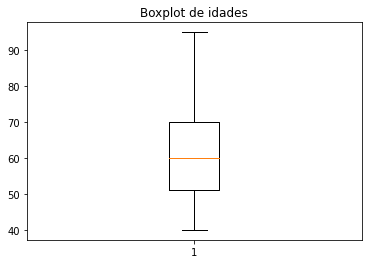

In [116]:
plt.boxplot(dadosClinicos.age)
plt.title('Boxplot de idades')

Text(0.5, 1.0, 'Histograma de idades')

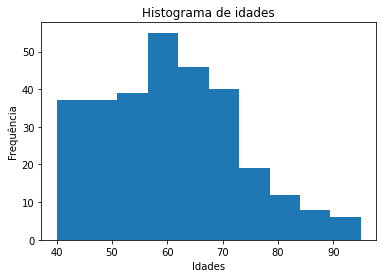

In [117]:
plt.hist(dadosClinicos.age)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Histograma de idades')

In [118]:
# Exploração da varíavel categórica anaemia
# Resumo estástico básico
dadosClinicos.anaemia.describe()

count       299
unique        2
top       False
freq        170
Name: anaemia, dtype: object

In [119]:
# Contagem de valores
dadosClinicos.anaemia.value_counts()

False    170
True     129
Name: anaemia, dtype: int64

Text(0.5, 1.0, 'Porcentagem de pacientes com anemia')

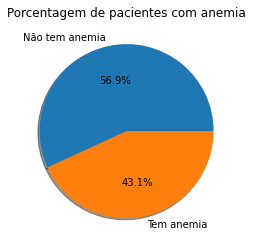

In [120]:
labelsNomesAnemia = "Não tem anemia","Tem anemia"
plt.pie(dadosClinicos.anaemia.value_counts(),labels = labelsNomesAnemia, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de pacientes com anemia')

Text(0.5, 1.0, 'Quantidade de pacientes com e sem anemia')

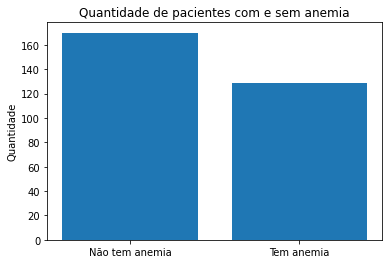

In [121]:
plt.bar(labelsNomesAnemia,dadosClinicos.anaemia.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes com e sem anemia')

In [122]:
# Exploração da varíavel creatinine_phosphokinase
# Resumo estástico básico
dadosClinicos.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Text(0.5, 1.0, 'Boxplot de creatinine_phosphokinase')

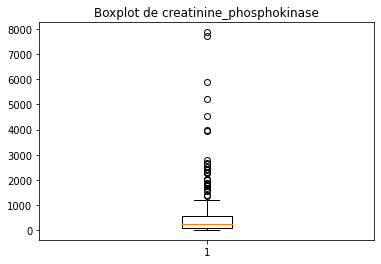

In [123]:
plt.boxplot(dadosClinicos.creatinine_phosphokinase)
plt.title('Boxplot de creatinine_phosphokinase')
# Note que há bastante outliers, necessário ajustar para o modelo preditivo

Text(0.5, 1.0, 'Histograma de creatinine_phosphokinase (CPK) no sangue')

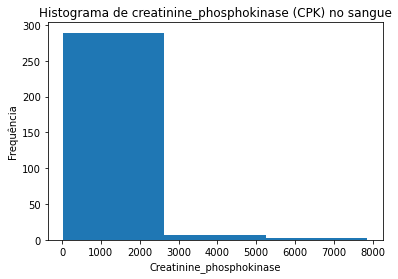

In [124]:
plt.hist(dadosClinicos.creatinine_phosphokinase,bins = 3)
plt.xlabel("Creatinine_phosphokinase")
plt.ylabel("Frequência")
plt.title("Histograma de creatinine_phosphokinase (CPK) no sangue")

In [125]:
# Exploração da variável diabetes (categórica)
# Contagem de valores
dadosClinicos.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Porcentagem de pacientes com diabetes')

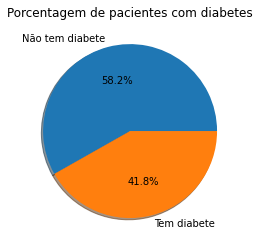

In [126]:
labelsNomesDiabetes = "Não tem diabete","Tem diabete "
plt.pie(dadosClinicos.diabetes.value_counts(),labels = labelsNomesDiabetes, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de pacientes com diabetes')

Text(0.5, 1.0, 'Quantidade de pacientes sem e com diabete')

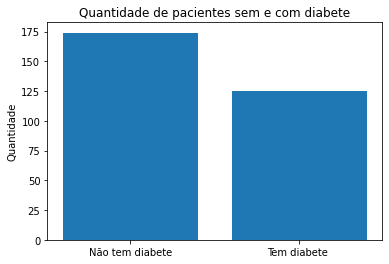

In [127]:
plt.bar(labelsNomesDiabetes,dadosClinicos.diabetes.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes sem e com diabete')

In [128]:
# Exploração da varíavel ejection_fraction
# Resumo estástico rápido
dadosClinicos.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Text(0.5, 1.0, 'Boxplot de ejection_fraction')

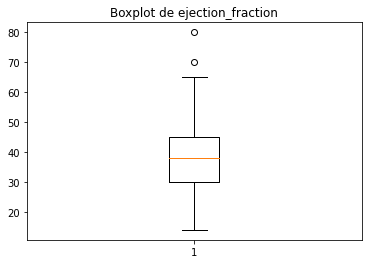

In [129]:
plt.boxplot(dadosClinicos.ejection_fraction)
plt.title('Boxplot de ejection_fraction')

Text(0.5, 1.0, "Histograma de 'ejection_fraction'")

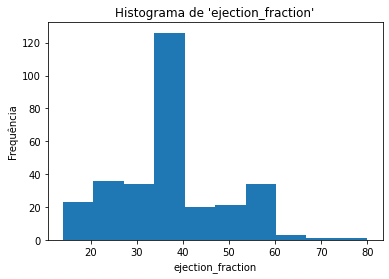

In [130]:
plt.hist(dadosClinicos.ejection_fraction)
plt.xlabel("ejection_fraction")
plt.ylabel("Frequência")
plt.title("Histograma de 'ejection_fraction'")

In [131]:
# Exploração da variável 'high_blood_pressure' (categórica)

In [132]:
# Contagem de valores
dadosClinicos.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

Text(0.5, 1.0, 'Porcentagem de pacientes com pressão alta')

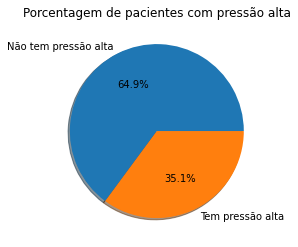

In [133]:
labelsNomesPressaoAlta = "Não tem pressão alta","Tem pressão alta "
plt.pie(dadosClinicos.high_blood_pressure.value_counts(),labels = labelsNomesPressaoAlta, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de pacientes com pressão alta')

Text(0.5, 1.0, 'Quantidade de pacientes sem e com pressão alta')

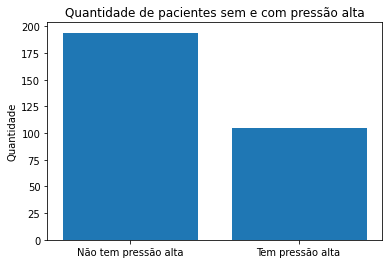

In [134]:
# Quantidade
plt.bar(labelsNomesPressaoAlta,dadosClinicos.high_blood_pressure.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes sem e com pressão alta')
# plt.hist(dadosClinicos.ejection_fraction, bins = 2) # não agrega muito

In [135]:
# Exploração da varíavel platelets (quantitativa)
# Resumo estátistico breve
dadosClinicos.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

Text(0.5, 1.0, 'Boxplot Plaquetas (mg/mL) no sangue')

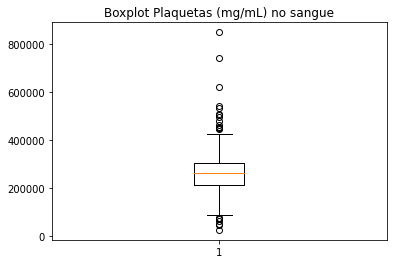

In [136]:
plt.boxplot(dadosClinicos.platelets)
plt.title('Boxplot Plaquetas (mg/mL) no sangue')
# Note que há bastante outliers

Text(0, 0.5, 'Frequência')

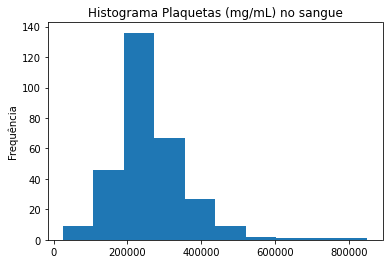

In [137]:
plt.hist(dadosClinicos.platelets)
plt.title('Histograma Plaquetas (mg/mL) no sangue')
plt.ylabel('Frequência')

In [138]:
# Exploração variável quantitativa 'serum_creatinine' 
# Resumo estástico rápido
dadosClinicos.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Text(0.5, 1.0, 'Boxplot - Nível de creatinina sérica no sangue (mg / dL)')

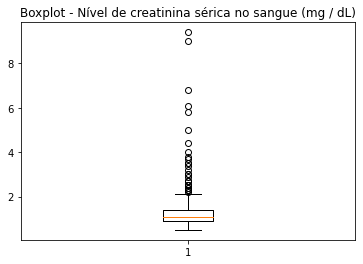

In [139]:
plt.boxplot(dadosClinicos.serum_creatinine)
plt.title('Boxplot - Nível de creatinina sérica no sangue (mg / dL)')
# Há bastante valores outliers

Text(0, 0.5, 'Frequência')

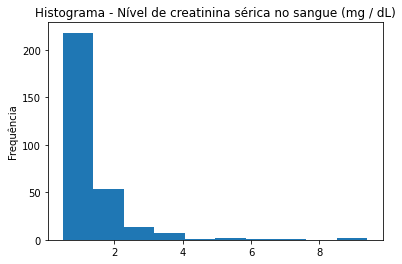

In [140]:
plt.hist(dadosClinicos.serum_creatinine)
plt.title('Histograma - Nível de creatinina sérica no sangue (mg / dL)')
plt.ylabel('Frequência')

In [141]:
# Exploração da varíavel serum_sodium (quantitativa)
# Resumo estástico rápido
dadosClinicos.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Text(0.5, 1.0, 'Boxplot - Nível de sódio sérico no sangue (mEq / L)')

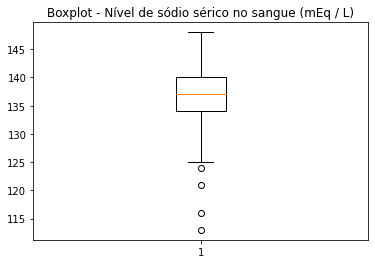

In [142]:
plt.boxplot(dadosClinicos.serum_sodium)
plt.title('Boxplot - Nível de sódio sérico no sangue (mEq / L)')

Text(0, 0.5, 'Frequência')

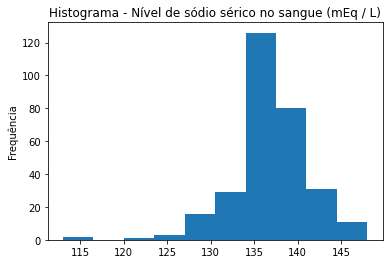

In [143]:
plt.hist(dadosClinicos.serum_sodium)
plt.title('Histograma - Nível de sódio sérico no sangue (mEq / L)')
plt.ylabel('Frequência')

In [144]:
# Exploração da varíavel sex (categórica)

In [145]:
# Contagem de valores
dadosClinicos.sex.value_counts()

M    194
F    105
Name: sex, dtype: int64

Text(0.5, 1.0, 'Porcentagem de sexo')

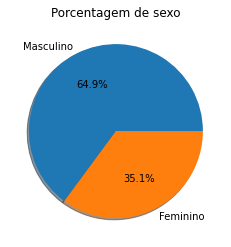

In [146]:
labelsNomesSexo = "Masculino","Feminino"
plt.pie(dadosClinicos.sex.value_counts(),labels = labelsNomesSexo, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de sexo')

Text(0.5, 1.0, 'Quantidade de sexo de pacientes')

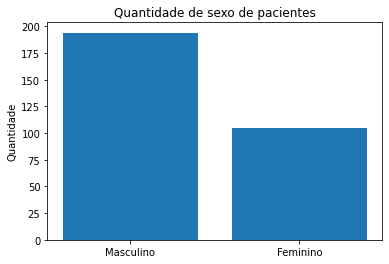

In [147]:
# Quantidade
plt.bar(labelsNomesSexo,dadosClinicos.sex.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de sexo de pacientes')

In [148]:
# Exploração da varíavel smoking (categórica)

In [149]:
# Contagem de valores
dadosClinicos.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

Text(0.5, 1.0, 'Porcentagem de fumantes')

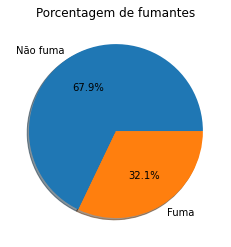

In [150]:
labelsNomesFumantesOuNao = "Não fuma","Fuma"
plt.pie(dadosClinicos.smoking.value_counts(),labels = labelsNomesFumantesOuNao, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de fumantes')

Text(0.5, 1.0, 'Quantidade de fumantes')

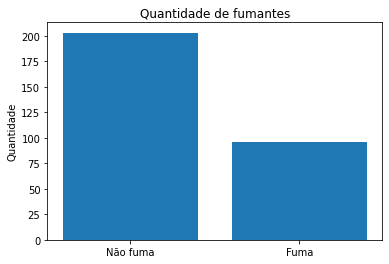

In [151]:
# Quantidade
plt.bar(labelsNomesFumantesOuNao,dadosClinicos.smoking.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de fumantes')

In [152]:
# Exploração da varíavel time representando número de dias (categórica)

In [153]:
# Contagem de valores
dadosClinicos.time.describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

Text(0.5, 1.0, 'Boxplot - Período de acompanhamento em dias')

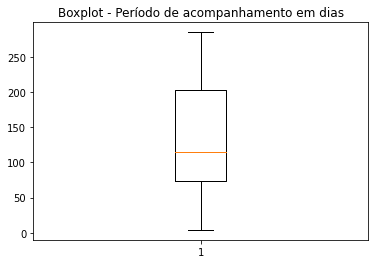

In [154]:
plt.boxplot(dadosClinicos.time)
plt.title('Boxplot - Período de acompanhamento em dias')

Text(0, 0.5, 'Frequência')

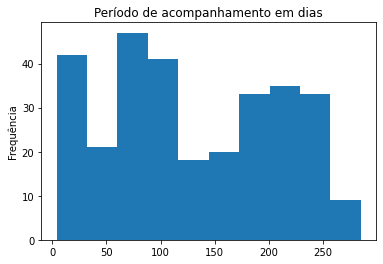

In [155]:
plt.hist(dadosClinicos.time)
plt.title('Período de acompanhamento em dias')
plt.ylabel('Frequência')

In [156]:
dadosClinicos.time

0        4
1        6
2        7
3        7
4        8
      ... 
294    270
295    271
296    278
297    280
298    285
Name: time, Length: 299, dtype: int64

In [157]:
# Exploração varíavel categórica dieOrNot

In [158]:
dadosClinicos.dieOrNot.value_counts()

False    203
True      96
Name: dieOrNot, dtype: int64

Text(0.5, 1.0, 'Porcentagem de Mortes')

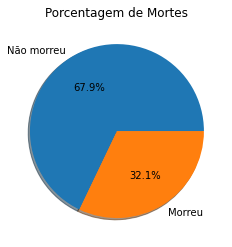

In [159]:
labelsNomesMorteOuNao = "Não morreu","Morreu"
plt.pie(dadosClinicos.dieOrNot.value_counts(),labels = labelsNomesMorteOuNao, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de Mortes')

Text(0.5, 1.0, 'Quantidade de Mortes')

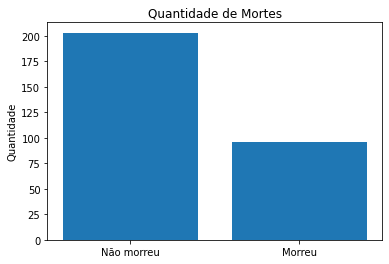

In [160]:
# Quantidade
plt.bar(labelsNomesMorteOuNao,dadosClinicos.dieOrNot.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de Mortes')

In [161]:
# Análise multivariada (duas ou mais varíaveis). 
# Correlação entre variáveis. 
# Correlação varia entre -1 (correlação negativa: uma diminui, outra aumenta) a 1 (correlação positiva, ambas
# variáveis vão no mesmo sentido). Correlação identifica o relacionamento linear entre variáveis, o que 
# não significa causalidade.
# corr() = a correlação de Pearson
dadosClinicos.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,dieOrNot
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.018926,-0.224265,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.002421,-0.009346,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.147173,0.033726,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.055711,-0.196439,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,0.028234,0.010514,-0.049139
serum_creatinine,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,-0.027414,-0.149315,0.294278
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,0.004813,0.087640,-0.195204
smoking,0.018926,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.004813,1.000000,-0.022839,-0.012623


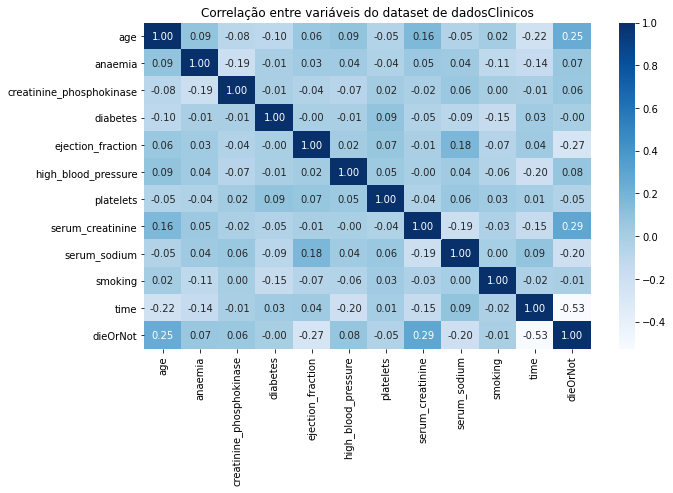

In [162]:
# Gráfico de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(dadosClinicos.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de dadosClinicos')
plt.show()
# As correlação estão fracas, considere que boas seriam em torno de 70% ...

In [163]:
# Análise: idade e nível de creatinine_phosphokinase     

Text(0.5, 1.0, 'Relação Idade x Nível de creatinina sérica')

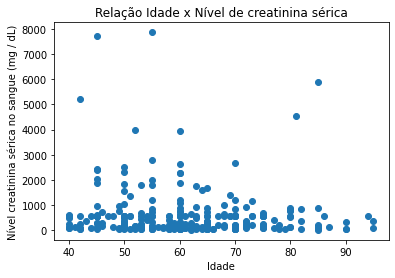

In [164]:
# Comprovando a correlação, por exemplo, entre age e creatinine_phosphokinase, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.creatinine_phosphokinase)
plt.xlabel("Idade")
plt.ylabel("Nível creatinina sérica no sangue (mg / dL)")
plt.title('Relação Idade x Nível de creatinina sérica')

Text(0.5, 1.0, 'Nível de sódio sérico no sangue (mEq / L)')

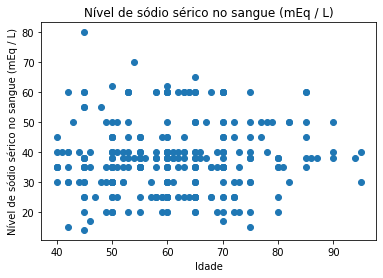

In [165]:
# Análise: idade x nível de ejection_fraction
# Comprovando a correlação, por exemplo, entre age e ejection_fraction, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.ejection_fraction)
plt.xlabel("Idade")
plt.ylabel("Nível de sódio sérico no sangue (mEq / L)")
plt.title("Nível de sódio sérico no sangue (mEq / L)")

Text(0.5, 1.0, 'Nível Plaquetas (mg/mL) no sangue por idade')

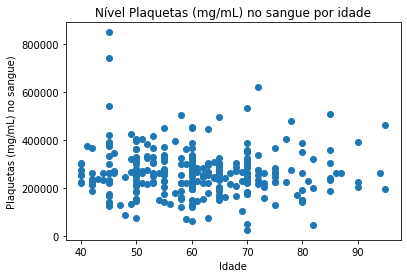

In [166]:
# Análise: idades x plaquetas
# Comprovando a correlação, por exemplo, entre age e plaquetas, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.platelets)
plt.xlabel("Idade")
plt.ylabel("Plaquetas (mg/mL) no sangue)")
plt.title("Nível Plaquetas (mg/mL) no sangue por idade")

Text(0.5, 1.0, "Nível serum_creatinine'enzima CPK' (mg/mL)  por idade")

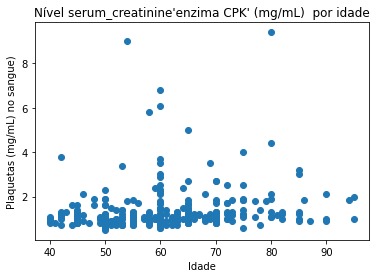

In [167]:
# Análise: idades x serum_creatinine
# Comprovando a correlação, por exemplo, entre age e serum_creatinine, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.serum_creatinine)
plt.xlabel("Idade")
plt.ylabel("Plaquetas (mg/mL) no sangue)")
plt.title("Nível serum_creatinine'enzima CPK' (mg/mL)  por idade")

Text(0.5, 1.0, 'Nível serum_sodium por idade')

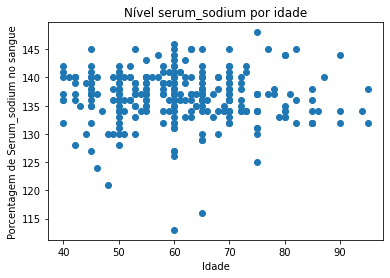

In [168]:
# Análise: idades x serum_sodium 
# Comprovando a correlação, por exemplo, entre age e serum_creatinine, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.serum_sodium)
plt.xlabel("Idade")
plt.ylabel("Porcentagem de Serum_sodium no sangue")
plt.title("Nível serum_sodium por idade")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Contagem de Pacientes Anémicos por Sexo')

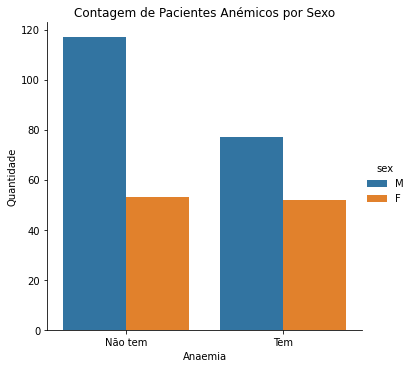

In [169]:
# Contar quantos tem anaemia categorizando por sexo
anaemia_map = {0: 'Não tem', 1: 'Tem'}
sns.factorplot('anaemia',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(anaemia_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Anaemia')
plt.title('Contagem de Pacientes Anémicos por Sexo')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Contagem de Pacientes Diabéticos por Sexo')

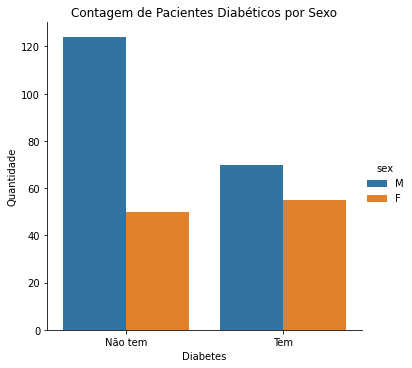

In [170]:
# Contar quantos são diabéticos por sexo 
diabete_map = {0: 'Não tem', 1: 'Tem'}
sns.factorplot('diabetes',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(diabete_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Diabetes')
plt.title('Contagem de Pacientes Diabéticos por Sexo')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Contagem de Pacientes Fumantes por Sexo')

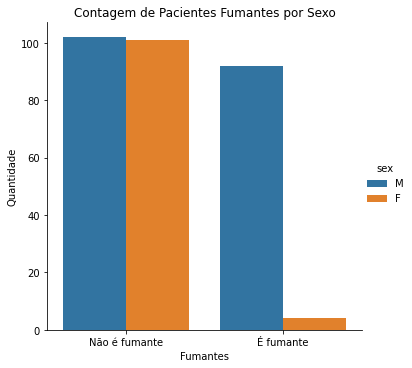

In [171]:
# Contagem de Pacientes Fumantes por Sexo
fumantes_map = {0: 'Não é fumante', 1: 'É fumante'}
sns.factorplot('smoking',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(fumantes_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Fumantes')
plt.title('Contagem de Pacientes Fumantes por Sexo')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Contagem de Pacientes por Pressão Alta por Sexo')

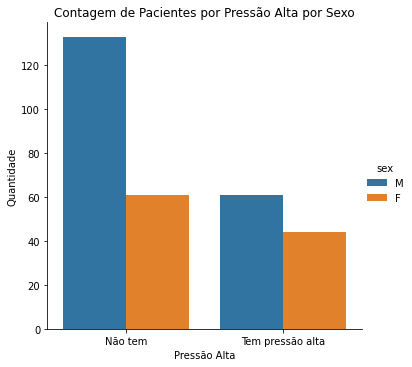

In [172]:
# Contar quantos tem pressão alta por sexo
pressaoAltaouNao_map = {0: 'Não tem', 1: 'Tem pressão alta'}
sns.factorplot('high_blood_pressure',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(pressaoAltaouNao_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Pressão Alta')
plt.title('Contagem de Pacientes por Pressão Alta por Sexo')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Contagem de Órbitos por Sexo')

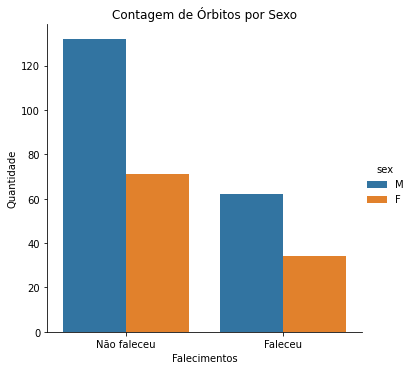

In [173]:
# Contar quantos morreram baseado no sexo
morreramOuNao_map = {0: 'Não faleceu', 1: 'Faleceu'}
sns.factorplot('dieOrNot',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(morreramOuNao_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Falecimentos')
plt.title('Contagem de Órbitos por Sexo')

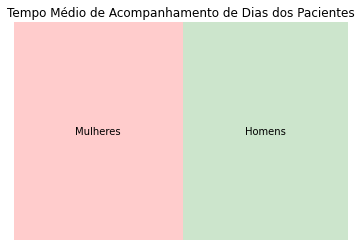

sex
F    131.904762
M    129.371134
Name: time, dtype: float64

In [174]:
# Tempo médio de acompanhamento em dias por sexo (total)
tempoMediaAcompanhSexo = dadosClinicos.groupby(['sex']).mean()
squarify.plot(sizes=[tempoMediaAcompanhSexo.iloc[0].time,
                     tempoMediaAcompanhSexo.iloc[1].time], label=["Mulheres", "Homens"], 
              color=["red","green"], alpha=.2)
plt.title('Tempo Médio de Acompanhamento de Dias dos Pacientes')
plt.axis('off')
plt.show()
tempoMediaAcompanhSexo.time

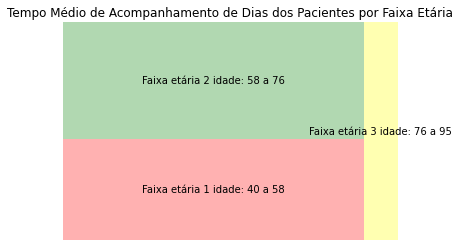

In [175]:
# Tempo de acompanhamento em dias por faixa de idade
valorMin = dadosClinicos.age.min()
valorMax = dadosClinicos.age.max()
divParte = (valorMax - valorMin)/3
squarify.plot(sizes=[len(dadosClinicos[dadosClinicos['age'].between(valorMin,valorMin+divParte)]),
                     len(dadosClinicos[dadosClinicos['age'].between(valorMin+divParte,valorMin+(divParte*2))]),
                     len(dadosClinicos[dadosClinicos['age'].between(valorMin+(divParte*2),valorMax)])
                    ], 
              label=["Faixa etária 1 idade: %d a %d" %(valorMin,valorMin+divParte), 
                     "Faixa etária 2 idade: %d a %d" %(valorMin+divParte,valorMin+(divParte*2)),
                     "Faixa etária 3 idade: %d a %d" %(valorMin+(divParte*2),valorMax)], 
              color=["red","green","yellow"], alpha=.3)
plt.title('Tempo Médio de Acompanhamento de Dias dos Pacientes por Faixa Etária')
plt.axis('off')
plt.show()